# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# The Data

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 275s 2us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

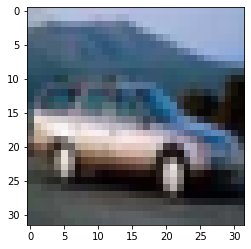

In [10]:
plt.imshow(x_train[4])

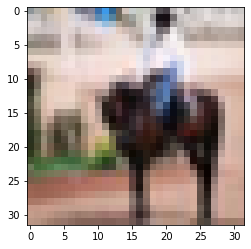

In [11]:
plt.imshow(x_train[11])

# Pre-processing

In [12]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
x_train.max()

255

In [14]:
#Normalizing
x_train = x_train/255

In [15]:
x_test = x_test/255

# Labels

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train)

In [19]:
y_cat_test = to_categorical(y_test)

In [20]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Model

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [23]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (32,32,3),activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (32,32,3),activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [27]:
model.fit(x_train,y_cat_train,epochs = 15,validation_data = (x_test,y_cat_test),callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4828 - accuracy: 0.4628 - val_loss: 1.2666 - val_accuracy: 0.5420
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1537 - accuracy: 0.5915 - val_loss: 1.1385 - val_accuracy: 0.5899
Epoch 3/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0017 - accuracy: 0.6481 - val_loss: 0.9937 - val_accuracy: 0.6516
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8874 - accuracy: 0.6893 - val_loss: 0.9826 - val_accuracy: 0.6614
Epoch 5/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7984 - accuracy: 0.7202 - val_loss: 0.9242 - val_accuracy: 0.6812
Epoch 6/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7153 - accuracy: 0.7489 - val_loss: 1.0655 - val_accuracy: 0.6454
Epoch 7/15
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6455 - accuracy: 0.7728 - val_loss: 0.9780 -

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.482838,0.46280,1.266569,0.5420
1,1.153680,0.59152,1.138524,0.5899
2,1.001707,0.64810,0.993735,0.6516
3,0.887422,0.68926,0.982554,0.6614
4,0.798375,0.72022,0.924178,0.6812


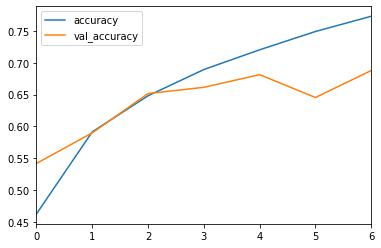

In [30]:
losses[['accuracy','val_accuracy']].plot()

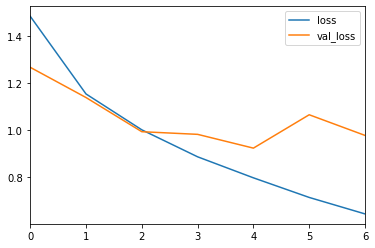

In [31]:
losses[['loss','val_loss']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9780 - accuracy: 0.6877


[0.9780495166778564, 0.6876999735832214]

# Evaluation

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
predictions

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.69      0.89      0.78      1000
           2       0.59      0.57      0.58      1000
           3       0.53      0.44      0.48      1000
           4       0.63      0.64      0.64      1000
           5       0.62      0.56      0.59      1000
           6       0.68      0.84      0.75      1000
           7       0.80      0.70      0.75      1000
           8       0.82      0.78      0.80      1000
           9       0.83      0.70      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [39]:
confusion_matrix(y_test,predictions)

array([[747,  40,  42,  16,  22,   9,  17,   8,  78,  21],
       [ 21, 890,   1,   6,   2,   5,  11,   0,  22,  42],
       [ 75,  21, 567,  54,  82,  64,  96,  19,  13,   9],
       [ 26,  41,  79, 439,  88, 151, 112,  32,  15,  17],
       [ 21,  15,  93,  55, 642,  31,  73,  57,  11,   2],
       [ 14,  20,  68, 172,  55, 558,  52,  48,   3,  10],
       [  7,  22,  47,  31,  20,  14, 845,   4,   4,   6],
       [ 22,  11,  32,  41,  82,  58,  25, 705,   5,  19],
       [ 74,  67,  14,  11,  13,  10,  10,   2, 779,  20],
       [ 52, 166,  11,   9,   7,   6,  10,  10,  24, 705]], dtype=int64)

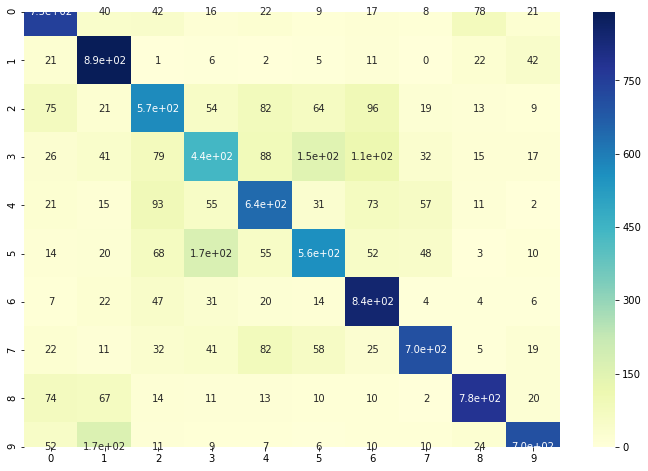

In [48]:
import seaborn as sns
plt.figure(figsize = (12,8))
plt.ylim(12,0)
sns.heatmap(confusion_matrix(y_test,predictions),annot = True,cmap = 'YlGnBu')

In [49]:
my_image = x_test[16]

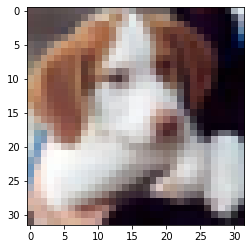

In [50]:
plt.imshow(my_image)

In [51]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)


airplane   -  0
automobile -  1
bird       -  2
cat        -  3
deer       -  4
dog        -  5
frog       -  6
horse      -  7
ship       -  8
truck      -  9
